# Medical Data Visualizer

## Data description
The rows in the dataset represent patients and the columns represent information like body measurements, results from various blood tests, and lifestyle choices. You will use the dataset to explore the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.    
File name: medical_examination.csv

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

print('pd:', pd.__version__)
print('sns:', sns.__version__)
print('np:', np.__version__)

pd: 1.5.3
sns: 0.12.2
np: 1.24.2


### 000- Import Data

In [3]:
### 111- Import data
df = pd.read_csv('medical_examination.csv')
print(df.shape)
display(df.head())
df.sample(10)

(70000, 13)


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
515,740,21016,1,162,84.0,120,80,1,1,0,0,0,1
13967,19929,22550,2,177,82.0,120,80,1,1,0,0,1,1
67247,96023,22062,2,160,76.0,140,90,1,1,1,1,0,1
6542,9311,23390,2,170,61.0,130,90,1,2,0,0,1,0
3761,5316,19025,2,174,89.0,130,90,1,1,0,0,1,1
29354,41949,22210,1,164,65.0,110,70,1,1,0,0,1,1
8988,12813,21944,1,161,78.0,120,80,1,1,0,0,1,1
18946,27054,20328,1,159,53.0,120,70,1,1,0,0,1,0
50404,71930,19084,1,160,110.0,130,90,3,1,0,1,1,1
2937,4141,19882,1,160,75.0,140,90,1,2,0,0,1,1


### References:
- age: objetive feature - int (days)
- sex: of - categorical code ?
- height: of - int (cm)
- weight: of - float (kg)
- ap_hi: examination feature - int - Systolic blood pressure
- ap_lo: ef - int - Diastolic blood pressure
- cholesterol: ef - 1: normal, 2: above normal, 3: well above normal
- gluc: ef - 1: , 2:, 3: idem cholesterol - Glucose
- smoke: subjective feature - binary
- alco: sf - binary - Alcohol intake - binary
- active: df - binary - Physical activity
- cardio: target variable - binary - Presence or absence of cardiovascular disease

### 111- Next Task: add overweight column
Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [4]:
# height_m (in m). = height / 100 = h * 0.01
newS1 = df.height * 0.01
newS1

# Sqr height_m = (height * 0.01) ** 2
newS2 = (df.height * 0.01) ** 2
newS2

# BMI = weight / (height * 0.01) ** 2
bmiS3 = df.weight / ((df.height * 0.01) ** 2)
bmiS3

0        21.967120
1        34.927679
2        23.507805
3        28.710479
4        23.011177
           ...    
69995    26.927438
69996    50.472681
69997    31.353579
69998    27.099251
69999    24.913495
Length: 70000, dtype: float64

In [5]:
#df['bmi'] = df.weight / ((df.height * 0.01) ** 2)
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [6]:
# conditional column creation:
    # 1. df[]= [1 if x > 25 else 0 for x in (df.weight / ((df.height * 0.01) ** 2))]    # Faster and most used
    # 2. df[] = np.where((df.weight / ((df.height * 0.01) ** 2)) > 25, 1, 0)
    # 3. df[] = df.bmi.map(lambda x: 1 if x > 25 else 0)       # with the auxiliary bmi column - NOT here
    # -- also: df['overweight'] = (df['weight'] / (df['height'] / 100) ** 2).apply(lambda v: 0 if v < 25 else 1)
    # __ als1A: df.loc[(df['weight'] / ((df['height'] / 100) ** 2)) > 25, 'overweight'] = 1
    # __ als1B: df.loc[(df['weight'] / ((df['height'] / 100) ** 2)) < 25, 'overweight'] = 0
# apply for Series, applymap for DF, map for both

#df['overweight'] = [0 if x < 25 else 1 for x in df['bmi']]

df['overweight'] = [1 if x > 25 else 0 for x in df.weight / ((df.height * 0.01) ** 2)]
#df['overweight'] = np.where((df.weight / ((df.height * 0.01) ** 2)) > 25, 1, 0)

df


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1


### 222- Normalize the data by making 0 always good and 1 always bad.
If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.

In [7]:
# valid comment above about conditional 
# for col in (df.cholesterol, df.gluc):
#     col = col.map(lambda x: 0 if x == 1 else 1) -- NO ANDA!!!!
df['cholesterol'] = df.cholesterol.map(lambda x: 0 if x == 1 else 1)
df['gluc'] = df.gluc.map(lambda x: 0 if x == 1 else 1)
df

## __ als:
# df.loc[df['cholesterol'] == 1, 'cholesterol'] = 0
# df.loc[df['cholesterol'] > 1, 'cholesterol'] = 1
# df.loc[df['gluc'] == 1, 'gluc'] = 0
# df.loc[df['gluc'] > 1, 'gluc'] = 1

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


### 333- Draw Categorical Plot
def draw_cat_plot():
- Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
- Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
- Draw the catplot with 'sns.catplot()'.
- Get the figure for the output    
- Do not modify the next two lines  (fig.savefig('catplot.png'); return fig).

- https://seaborn.pydata.org/tutorial/data_structure.html    Long-form vs. Wide-form
- https://stackoverflow.com/questions/60625159/using-pandas-dataframe-melt-to-plot-data-with-seaborn
- https://stackoverflow.com/questions/51519101/
- https://pandas.pydata.org/docs/reference/api/pandas.melt.html
- https://pbpython.com/seaborn09.html
- https://datavizpyr.com/stripplot-using-seaborn-catplot/
- https://github.com/mwaskom/seaborn/issues/1702


In [8]:
   # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc',
    # 'smoke', 'alco', 'active', and 'overweight'.

df_cat = df.melt(id_vars='cardio',
                value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
df_cat

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


In [9]:
# Group and reformat the data to split it by 'cardio'. Show the counts of each feature.
# You will have to rename one of the columns for the catplot to work correctly.
df_cat['total'] = 1
#df_cat = df_cat.groupby(['cardio','variable', 'value']).count()
df_cat = df_cat.groupby(['cardio','variable', 'value'], as_index=False).count()
df_cat

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,0,15915
9,0,overweight,1,19106


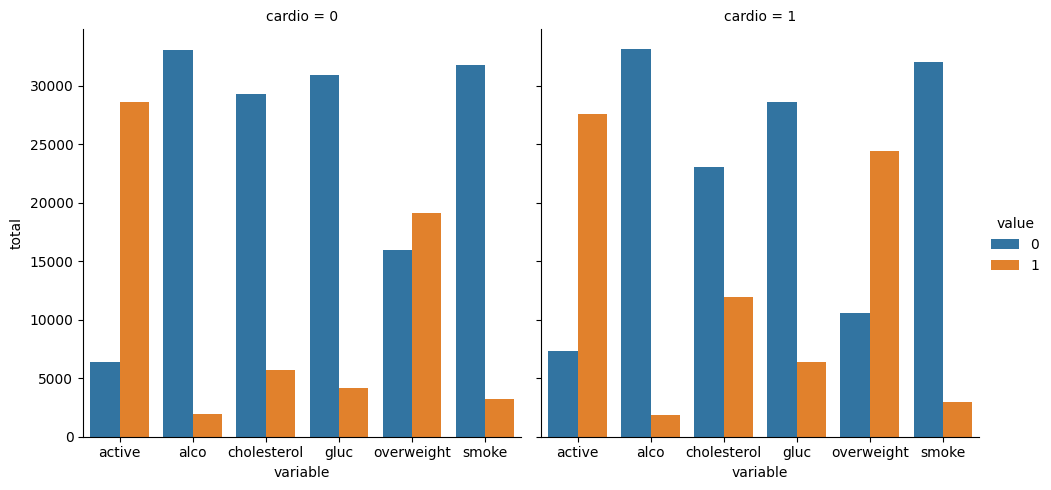

In [10]:
# Draw the catplot with 'sns.catplot()'
g = sns.catplot(data= df_cat, x='variable', y= 'total', col='cardio', hue='value', kind='bar')

In [11]:
print('type(g):', type(g))

# Get the figure for the output
fig = g.figure
print('type(fig):', type(fig))

# Do not modify the next two lines
# fig.savefig('catplot.png')

type(g): <class 'seaborn.axisgrid.FacetGrid'>
type(fig): <class 'matplotlib.figure.Figure'>


### 444- Clean the data. Filter out the following patient segments that represent incorrect data:
1. diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
    - diastolic blood pressure: 'ap_lo'; systolic blood pressure: 'ap_hi; 'ap_lo' must be <= 'ap_hi' 
2.  height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
3.  height is more than the 97.5th percentile
4.  weight is less than the 2.5th percentile
5.  weight is more than the 97.5th percentile


In [12]:
# 1. diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
wrong_pressures = (df.loc[df['ap_lo'] > df['ap_hi']])          # all WRONG DATA... 
display(wrong_pressures)
wrong_pressures.shape[0], len(wrong_pressures), len(wrong_pressures.index)
# len(wrong_pressures.index) --> FASTER

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
228,314,17489,2,183,98.0,160,1100,0,1,1,0,1,1,1
241,334,21932,2,157,60.0,160,1000,1,0,0,0,0,1,0
260,357,18217,1,150,83.0,140,800,0,0,0,0,1,1,1
329,458,23407,1,176,63.0,160,1000,1,1,0,0,0,1,0
345,482,18704,1,154,81.0,140,1000,1,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69771,99659,23330,1,167,81.0,160,1000,0,0,0,0,1,1,1
69872,99798,21808,1,152,56.0,160,1000,0,0,0,0,1,1,0
69878,99807,21239,2,168,95.0,160,1000,0,0,0,0,1,1,1
69885,99816,22417,2,166,78.0,170,1000,0,0,0,0,0,0,1


(1234, 1234, 1234)

In [13]:
# future: analize haw to DELETE (.drop) rows from a DF
good_pressures = df.loc[df['ap_lo'] <= df['ap_hi']]           # Good data
display(good_pressures)
print(good_pressures.shape[0], len(good_pressures.index))
len(wrong_pressures.index), len(good_pressures), len(wrong_pressures.index) + len(good_pressures.index)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


68766 68766


(1234, 68766, 70000)

In [14]:
# 1. 
dfp = df.loc[df['ap_lo'] <= df['ap_hi']]
dfp

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [15]:
### some test for point 2., 3., 4, 5. to filter
print(df.describe())

                 id           age           sex        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349843    164.359229     74.205690   
std    28851.302323   2467.251667      0.477253      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      3.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      0.251643      0.150300      0.088129   
std      154.011419    188.472530      0.433960    

In [16]:
for col in [df.height, df.weight]:
    print(col.name.center(20, '-'))
    for percent in [0.025, 0.25, 0.50, 0.75, 0.975]:
        print(col.quantile(percent), end='  ')
    print('\nmin:', col.min(), ' - mean:', col.mean(), ' - max:', col.max())


-------height-------
150.0  159.0  165.0  170.0  180.0  
min: 55  - mean: 164.35922857142856  - max: 250
-------weight-------
51.0  65.0  72.0  82.0  108.0  
min: 10.0  - mean: 74.20569  - max: 200.0


In [17]:
df_heat = df.loc[
    (df['ap_lo'] <= df['ap_hi']) &
    (df['height'] >= df['height'].quantile(0.025)) &
    (df['height'] <= df['height'].quantile(0.975)) &
    (df['weight'] >= df['weight'].quantile(0.025)) &
    (df['weight'] <= df['weight'].quantile(0.975))
    ]

df_heat
           

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [18]:
for col in [df_heat.height, df_heat.weight]:
    print(col.name.center(20, '-'))
    for percent in [0.025, 0.25, 0.50, 0.75, 0.975]:
        print(col.quantile(percent), end='  ')
    print('\nmin:', col.min(), ' - mean:', col.mean(), ' - max:', col.max())

-------height-------
152.0  160.0  165.0  169.0  178.0  
min: 150  - mean: 164.49011207891368  - max: 180
-------weight-------
54.0  65.0  72.0  81.0  100.0  
min: 51.0  - mean: 73.52538373986309  - max: 108.0


In [19]:
# # 2. height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
dfh = df.loc[df['height'] >= df['height'].quantile(0.025)]
dfh

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [20]:
# # 3.  height is more than the 97.5th percentile
dfh = dfh.loc[df['height'] <= df['height'].quantile(0.975)]
dfh

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [21]:
# # 4.  weight is less than the 2.5th percentile
dfh = dfh.loc[df['weight'] >= df['weight'].quantile(0.025)]
dfh

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [22]:
# # 5.  height is more than the 97.5th percentile
dfh = dfh.loc[df['weight'] <= df['weight'].quantile(0.975)]
dfh

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [23]:
for col in [dfh.height, dfh.weight]:
    print(col.name.center(20, '-'))
    for percent in [0.025, 0.25, 0.50, 0.75, 0.975]:
        print(col.quantile(percent), end='  ')
    print('\nmin:', col.min(), ' - mean:', col.mean(), ' - max:', col.max())

-------height-------
152.0  160.0  165.0  169.0  178.0  
min: 150  - mean: 164.48407197911487  - max: 180
-------weight-------
54.0  65.0  72.0  81.0  100.0  
min: 51.0  - mean: 73.58687608776728  - max: 108.0


### 555- Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap().
Mask the upper triangle. The chart should look like examples/Figure_2.png.

In [24]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [25]:
corr = df_heat.corr()
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089573
sex,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.172212
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.127986
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.088109
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003274


<Axes: >

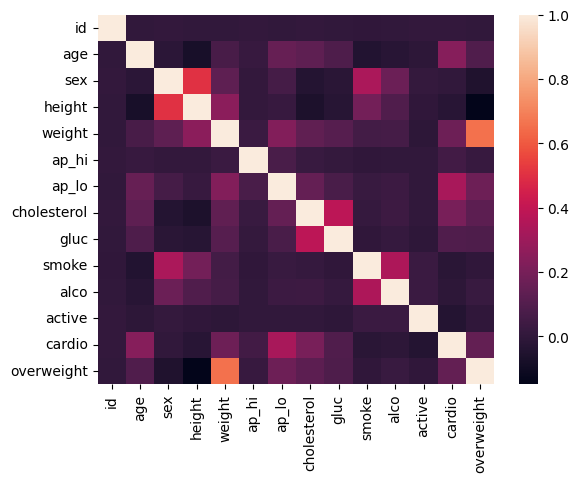

In [26]:
sns.heatmap(corr)

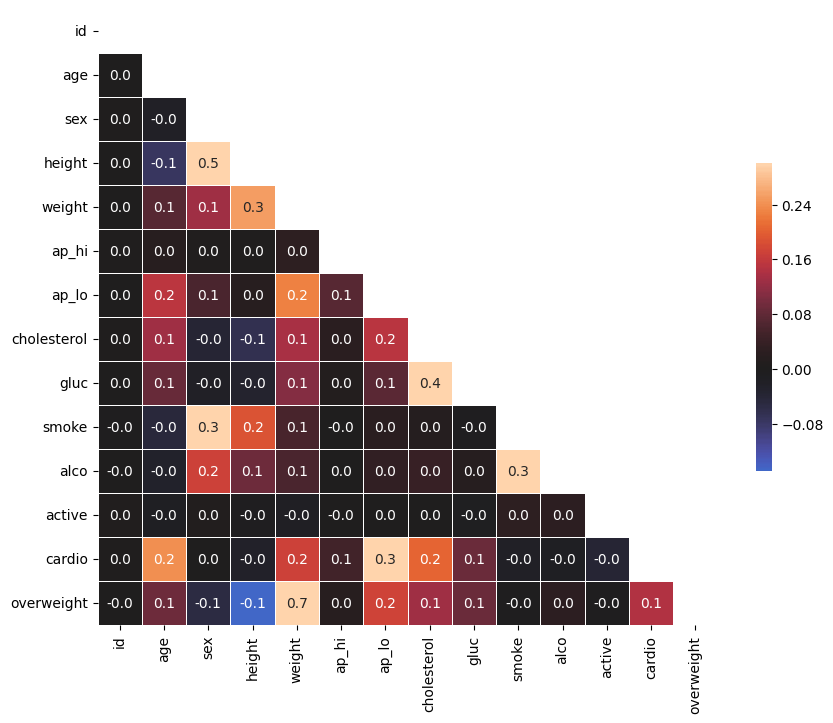

In [27]:
mask = np.triu(corr)
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr, annot=True, fmt='.1f',
                 mask=mask, vmax=.3, center=0, linewidths=.5,
                 cbar_kws={'shrink': .5, 'ticks': [-.08, .0, .08, .16, .24]})